# Discretization
Data discretization is a process of converting continuous data into discrete form. It is used to reduce the complexity of data and to make it easier to understand. Discretization is also known as binning, where continuous data is converted into a finite number of intervals. This is useful for data analysis and data mining techniques. In this notebook, I will show you how to discretize data using the following methods:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Impute missing values with the median
age_median = df['age'].median()
df['age'].fillna(age_median, inplace=True)
fare_median = df['fare'].median()
df['fare'].fillna(fare_median, inplace=True)



In [5]:
# age discretization
age_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df['age_bin']=age_discretizer.fit_transform(df[['age']])
df.head()

c:\Users\ATECH\.conda\envs\python_ml\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.0


<Axes: xlabel='age', ylabel='Count'>

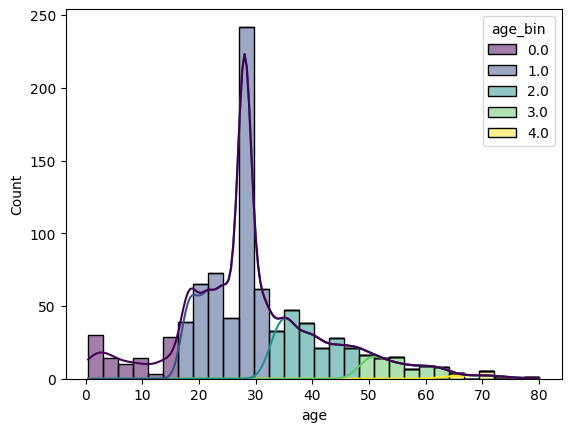

In [10]:
sns.histplot(df,x='age',hue='age_bin',multiple='stack',palette='viridis',kde=True)

<Axes: xlabel='age', ylabel='Count'>

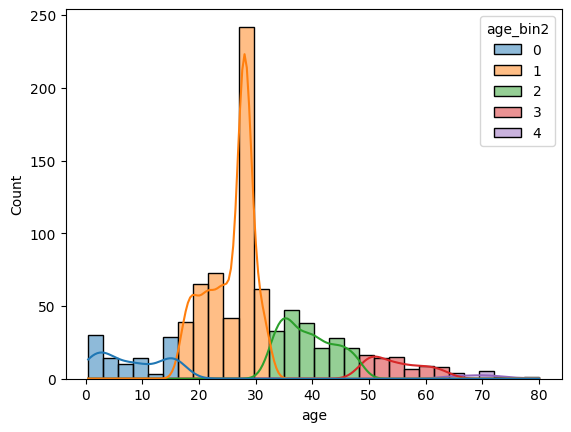

In [13]:
# using pandas cut
df['age_bin2'] = pd.cut(df['age'], bins=5, labels=[0,1,2,3,4])
sns.histplot(df,x='age',hue='age_bin2',kde=True)

<Axes: xlabel='age', ylabel='Count'>

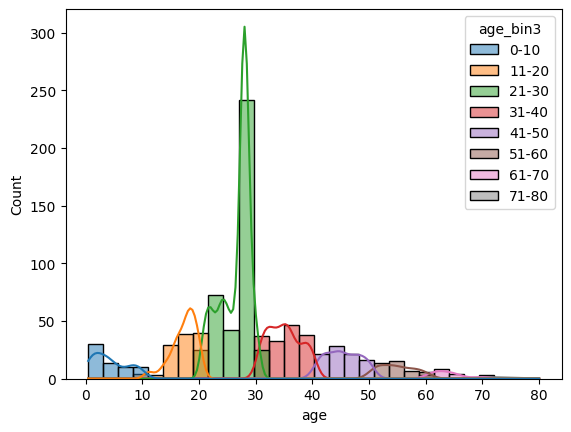

In [14]:
# define the bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['age_bin3'] = pd.cut(df['age'], bins=bins, labels=labels)
sns.histplot(df,x='age',hue='age_bin3',kde=True)